### General Additive Model - Splines and Other Inputs
#########################

Rob Rappa 5/29/19

#########################

References

1) E2E Splines: https://www.analyticsvidhya.com/blog/2018/03/introduction-regression-splines-python-codes/

2) Basis Function Code: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab13-py.html

3) Patsy Documentation: https://patsy.readthedocs.io/en/latest/API-reference.html

In [38]:
#Import modules
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [11]:
#Read Data
data = pd.read_csv("/Users/robertjrappa/Documents/Life/Education/Self-Learning/ML_Projects/General Additive Model/isl_data_wage.csv")

data.head()

,ID,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


## Create model of just wage ~ splines(age)

In [12]:
#Dependent and Independent
data_x = data['age']
data_y = data['wage']

#Divide data into train and test
train_x, valid_x, train_y, valid_y = train_test_split(data_x, data_y, test_size=0.33, random_state = 12345)

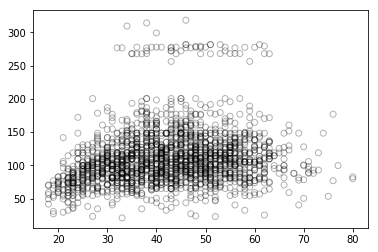

In [14]:
# Visualize the relationship b/w age and wage
plt.scatter(train_x, train_y, facecolor='None', edgecolor='k', alpha=0.3)
plt.show()

In [19]:
# Build the spline basis functions
from patsy import dmatrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Generating cubic spline basis functions with 3 knots at 25, 40 and 60
# dmatrix(formula,dictionary_of_vals_in_formula,return_type)
# bs = basis function
spline_x = dmatrix("bs(train, knots=(25,40,60), degree=3, include_intercept=False)", {"train": train_x},return_type='dataframe')

#NOTE
#functions: b1(age), b2(age^2), b3(age^3), b4((age-knot1)^3), b5((age-knot2)^3), b6((age-knot3)^3)
spline_x.head()

,Intercept,"bs(train, knots=(25, 40, 60), degree=3, include_intercept=False)[0]","bs(train, knots=(25, 40, 60), degree=3, include_intercept=False)[1]","bs(train, knots=(25, 40, 60), degree=3, include_intercept=False)[2]","bs(train, knots=(25, 40, 60), degree=3, include_intercept=False)[3]","bs(train, knots=(25, 40, 60), degree=3, include_intercept=False)[4]","bs(train, knots=(25, 40, 60), degree=3, include_intercept=False)[5]"
1837,1.0,0.000138,0.314711,0.590121,0.095030,0.0,0.0
1554,1.0,0.001102,0.359863,0.562949,0.076087,0.0,0.0
338,1.0,0.302617,0.586851,0.110255,0.000277,0.0,0.0
2839,1.0,0.000138,0.314711,0.590121,0.095030,0.0,0.0
1139,1.0,0.017218,0.495306,0.452845,0.034632,0.0,0.0


In [24]:
# Fit a GAM based on the splines

#  wage ~ splines(age)
#  wage ~ b0(age^0)+ b1(age)+  b2(age^2)+ b3(age^3)+ b4((age-knot1)^3)+ b5((age-knot2)^3)+ b6((age-knot3)^3)
gam_model = sm.GLM(train_y, transformed_x).fit()

gam_model

In [29]:
#Generate data to run OOS predictions on
#NOTE: Take the validation set x-values and transform them into the basis function
pred_x = dmatrix("bs(valid, knots=(25,40,60), include_intercept=False)", {"valid": valid_x}, return_type='dataframe')

pred_x.head()

,Intercept,"bs(valid, knots=(25, 40, 60), include_intercept=False)[0]","bs(valid, knots=(25, 40, 60), include_intercept=False)[1]","bs(valid, knots=(25, 40, 60), include_intercept=False)[2]","bs(valid, knots=(25, 40, 60), include_intercept=False)[3]","bs(valid, knots=(25, 40, 60), include_intercept=False)[4]","bs(valid, knots=(25, 40, 60), include_intercept=False)[5]"
2,1.0,0.000000,0.114796,0.618564,0.262733,0.003906,0.0
544,1.0,0.000000,0.114796,0.618564,0.262733,0.003906,0.0
1002,1.0,0.464876,0.482094,0.053030,0.000000,0.000000,0.0
1414,1.0,0.642514,0.314837,0.019326,0.000000,0.000000,0.0
188,1.0,0.464876,0.482094,0.053030,0.000000,0.000000,0.0


In [32]:
#Run OOS predictions

pred = gam_model.predict(pred_x)

pred.head()

2       118.617190
544     118.617190
1002     87.291351
1414     79.450699
188      87.291351
dtype: float64

In [40]:
#Evaluate model
rms = np.sqrt(mean_squared_error(valid_y, pred))
print(rms)

40.706933635622704


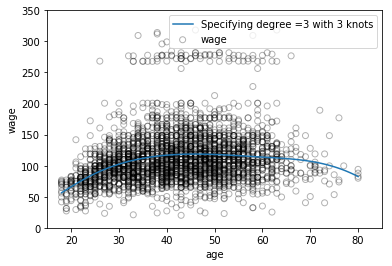

In [50]:
#Plot output

# Plot - generate x values (non-basis)
xp = np.linspace(valid_x.min(),valid_x.max(),100)

#Plot - generate transformed y values
xp_bs = dmatrix("bs(xp, knots=(25,40,60), include_intercept=False)", {"xp": xp}, return_type='dataframe')

#Plot - generate y values (based on transformed x-values)
pred_plot = gam_model.predict(xp_bs)

# Plot the splines and error bands
plt.scatter(data.age, data.wage, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(xp, pred_plot, label='Specifying degree =3 with 3 knots')
plt.legend()
plt.xlim(15,85)
plt.ylim(0,350)
plt.xlabel('age')
plt.ylabel('wage')
plt.show()


## Create model of wage ~ splines(age) + other feature

In [53]:
#  wage ~ splines(age) + feature_1

#  wage ~ (b0(age^0)+ b1(age)+  b2(age^2)+ b3(age^3)+ b4((age-knot1)^3)+ b5((age-knot2)^3)+ b6((age-knot3)^3)) \ 
#          + b7*feature_1